In [1]:
using Distributions, PyPlot

In [341]:
##Parameters
N = 11
q = .8
b = q/(1-q)
h = 1
p0 = .5
K = 1000

#Gen Pks normal.
ps = rand(K) * .5

#Expected Obj at alpha
function obj_k(alpha, p, p0)
    dist = Binomial(N, p)
   b * p + (1-cdf(dist, (1-q - alpha * p0)/(1-alpha) * N)) * (1-p-b*p)
end
function prob_portion(alpha, p, p0)
    dist = Binomial(N, p)
    (1-cdf(dist, (1-q - alpha * p0)/(1-alpha) * N))
end

obj(alpha, ps, p0) = mean(map(p-> obj_k(alpha, p, p0), ps))

obj (generic function with 1 method)

### Oracle benefits to shrinking can be very small/non-existant (e.g. N  = 10)

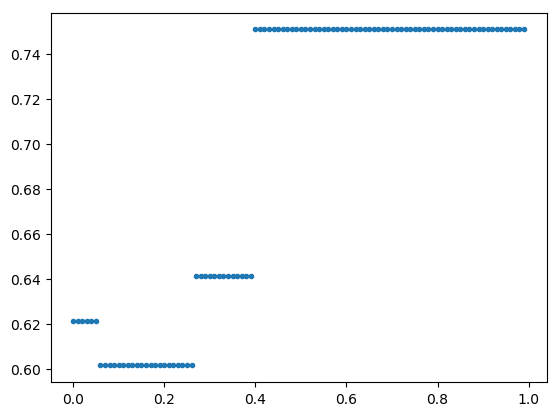

0.00.60162075342965470.03150643265998099


(0.06, 0.6016207534296547, 0.03150643265998099)

In [342]:
alpha_grid = linspace(0, .99, 100)
out = map(a->obj(a, ps, p0), alpha_grid)

println(alphaOR, minimum(out), 1-minimum(out)/out[1])
plot(alpha_grid, out, ".")

alphaOR = alpha_grid[indmin(out)]
alphaOR, minimum(out), 1-minimum(out)/out[1]

Observations:
- The oracle curve isn't always U shaped.  So can't use a derivatie at zero argument.
- For some values of N, there's no benefit.  (try $N = 10$ above)  I don't understand why.

### Original and shrunken cost-curves

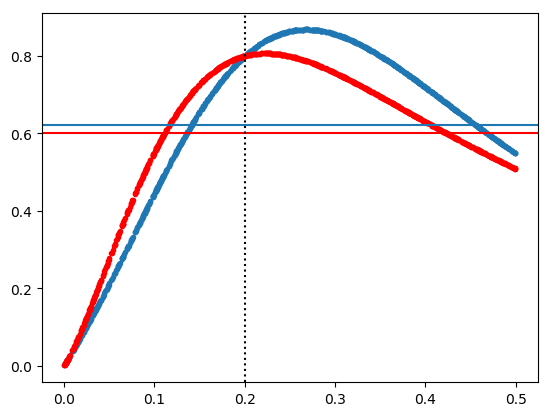

PyObject <matplotlib.lines.Line2D object at 0x13add6dd0>

In [343]:
#Plots the SAA cost curve across p_k and the shrunken cost curve across p_k.  Notice, Benefits when p_k > 1-q.

saa_objs = map(p-> obj_k(0, p, p0), ps)
or_objs = map(p->obj_k(alphaOR, p, p0), ps)
#full_objs = map(p->obj_k(.99, p, p0), ps)

plot(ps, saa_objs, ".")
plot(ps, or_objs, ".r")
#plot(ps, full_objs, "--k")
axhline(out[1])
axhline(minimum(out), color="r")
axvline(1-q, linestyle="dotted", color="k")

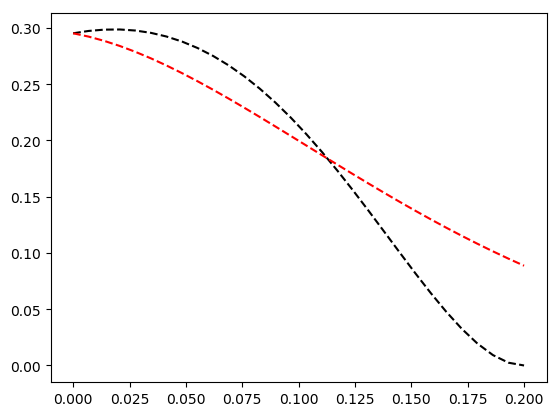

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13afb05d0>

In [344]:
##Evaluate the "deriv" at two points equally spaced from 1-q

delta = .01
low = 1-q - delta
high= 1-q + delta

function prob_deriv(p, p0, alpha)
    prob_portion(alpha, p, p0) - prob_portion(0, p, p0)
end
delta_grid = linspace(0, 1-q, 30)
low = map(d->prob_deriv(1-q-d, p0, alphaOR), delta_grid)
high= map(d->prob_deriv(1-q+d, p0, alphaOR), delta_grid)

plot(delta_grid, low, "--k")
plot(delta_grid, high, "--r")



### Plots the losses for $p_k < 1-q$ vs. the benefits for $p_k > 1-q$

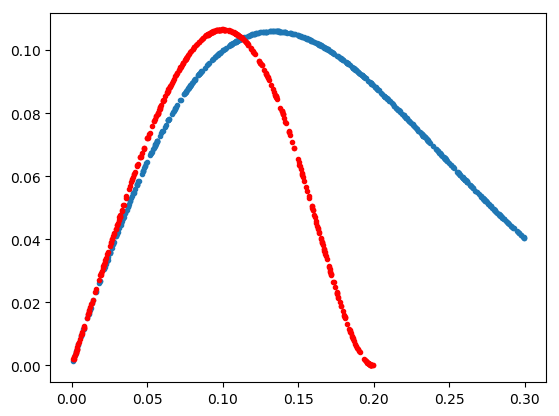

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13b11a9d0>

In [345]:
saa_objs = map(p-> obj_k(0, p, p0), ps)
or_objs = map(p->obj_k(alphaOR, p, p0), ps)

diff = or_objs - saa_objs

filt = ps .> 1-q
plot(ps[filt] - (1 -q), -diff[filt], ".")
plot(1-q -ps[.!filt], diff[.!filt], ".r")